In [4]:
import pandas as pd
import pyarrow as pa
import gzip as gz

In [5]:
df_ptsd_phi_vitals_sample003 = pd.read_feather(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\ptsd-phi\vitals-hl7m\003\1000000003-2016-07-07-0.0166667-1-HL7M.feather", columns=None, use_threads=True, storage_options=None)
df_ptsd_phi_vitals_sample003

,dts,AR1-D,AR1-M,AR1-R,AR1-S,CVP2,HR,NBP-D,NBP-M,NBP-R,...,SPO2-R,ST-AVF,ST-AVL,ST-AVR,ST-I,ST-II,ST-III,ST-V1,TP1-1,TP1-2
0,52680.0,48.0,58.0,134.0,70.0,14.0,140.0,NaN,NaN,NaN,...,136.0,-0.4,0.2,0.1,0.2,-0.4,-0.4,-0.5,NaN,NaN
1,52740.0,54.0,64.0,148.0,74.0,15.0,158.0,NaN,NaN,NaN,...,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52800.0,56.0,66.0,148.0,78.0,13.0,160.0,NaN,NaN,NaN,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52860.0,54.0,66.0,150.0,78.0,10.0,156.0,NaN,NaN,NaN,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4,NaN
4,52920.0,56.0,66.0,154.0,76.0,12.0,154.0,NaN,NaN,NaN,...,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,86100.0,46.0,54.0,156.0,62.0,7.0,136.0,NaN,NaN,NaN,...,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
603,86160.0,48.0,56.0,154.0,64.0,10.0,140.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
604,86220.0,46.0,56.0,146.0,64.0,9.0,140.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
605,86280.0,46.0,54.0,146.0,64.0,8.0,138.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8


In [18]:
df_ptsd_phi_vitals_sample003.iloc[:,0].diff()
#also 60s 1 min intervals - decent tim resolution

0       NaN
1      60.0
2      60.0
3      60.0
4      60.0
       ... 
602    60.0
603    60.0
604    60.0
605    60.0
606    19.0
Name: dts, Length: 607, dtype: float64

In [6]:
df_ptsd_phi_vitals_sb_sample528 = pd.read_feather(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\ptsd-phi\vitals-sb\528\1000002528-2020-06-26-1-GEVITAL.feather", columns=None, use_threads=True, storage_options=None)
df_ptsd_phi_vitals_sb_sample528

,dts,PARM_HR,PARM_PVC,PARM_ST_SEG1,PARM_ST_SEG2,PARM_ST_SEG3,PARM_ST_V1,PARM_ST_AVF,PARM_ST_AVL,PARM_ST_AVR,PARM_SPO2_1,PARM_SPO2_HR1,PARM_NBP_CUFF,PARM_RESP_RATE,PARM_NBP_SYS,PARM_NBP_MEAN,PARM_NBP_DIA,GE_HSDI_SIGNAL_ID_NON_INVASIVE_PRESS_pulseRate_NUM
0,4.295581e+07,136.0,0.0,0.4,0.4,-0.4,NaN,0.0,0.4,-0.4,100.0,138.0,NaN,19.0,NaN,NaN,NaN,NaN
1,4.295982e+07,137.0,0.0,0.4,0.4,-0.4,NaN,0.0,0.4,-0.4,100.0,138.0,NaN,19.0,NaN,NaN,NaN,NaN
2,4.296181e+07,137.0,0.0,0.4,0.4,-0.4,NaN,0.0,0.4,-0.4,100.0,138.0,NaN,20.0,NaN,NaN,NaN,NaN
3,4.296382e+07,137.0,0.0,0.5,0.3,-0.3,NaN,0.0,0.4,-0.4,100.0,138.0,NaN,20.0,NaN,NaN,NaN,NaN
4,4.296581e+07,136.0,0.0,0.5,0.3,-0.3,NaN,0.0,0.4,-0.4,100.0,137.0,NaN,21.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15305,7.356692e+07,113.0,0.0,1.3,0.8,-0.7,-0.9,0.0,1.0,-1.0,100.0,111.0,NaN,28.0,98.0,75.0,61.0,NaN
15306,7.356891e+07,113.0,0.0,1.3,0.8,-0.7,-0.9,0.0,1.0,-1.0,100.0,112.0,NaN,31.0,98.0,75.0,61.0,NaN
15307,7.357092e+07,113.0,0.0,1.7,0.8,-0.9,-1.1,0.0,1.3,-1.2,100.0,117.0,NaN,31.0,98.0,75.0,61.0,NaN
15308,7.357291e+07,115.0,0.0,1.7,0.8,-0.9,-1.1,0.0,1.3,-1.2,100.0,119.0,NaN,29.0,98.0,75.0,61.0,NaN


In [16]:
df_ptsd_phi_vitals_sb_sample528.iloc[:,0].diff()
#very large time interval ass resolution -DO NOT USE vitals_sb

0                NaN
1        4009.965088
2        1988.872070
3        2003.916016
4        1995.239990
            ...     
15305    2007.619873
15306    1989.240967
15307    2006.658203
15308    1994.155029
15309    2006.087891
Name: dts, Length: 15310, dtype: float64

In [7]:
df_ptsd_phi_vitals_tsdb_sample052 = pd.read_feather(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\ptsd-phi\vitals-tsdb\052\1000002052-2019-02-05-1-TSDB.feather", columns=None, use_threads=True, storage_options=None)
df_ptsd_phi_vitals_tsdb_sample052
#this is the one with HR, SpO2 and stuff


,dts,HR,HR_Art_2930,HR_SpO2_7876,Temp,awRR_3495,N2O_Insp_2885,N2O_Exp_2886,O2_Insp_2902,O2_Exp,...,PIP_1227,PEEP_1418,NIBP_S,ABP_S_2318,ABP_D_2319,ABP_M_2320,CO2_Insp_perc,EtCO2_2905,NIBP_D,NIBP_M
0,41520.0,96.0,NaN,212.0,36.599998,18.0,0.0,0.0,46.799999,40.000000,...,16.0,4.0,NaN,NaN,NaN,NaN,1.0,38.0,NaN,NaN
1,41580.0,90.0,NaN,90.0,36.599998,15.0,0.0,0.0,46.799999,40.000000,...,16.0,4.0,NaN,NaN,NaN,NaN,1.0,39.0,NaN,NaN
2,41640.0,90.0,NaN,90.0,36.599998,16.0,0.0,0.0,46.000000,40.799999,...,16.0,4.0,NaN,NaN,NaN,NaN,0.0,36.0,NaN,NaN
3,41700.0,90.0,90.0,90.0,36.599998,15.0,0.0,0.0,46.799999,40.799999,...,16.0,4.0,NaN,78.0,52.0,64.0,0.0,37.0,NaN,NaN
4,41760.0,92.0,92.0,92.0,36.599998,16.0,0.0,0.0,46.799999,40.799999,...,16.0,4.0,NaN,76.0,50.0,60.0,0.0,36.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,66060.0,104.0,104.0,104.0,37.200001,34.0,0.0,0.0,46.799999,40.799999,...,17.0,5.0,NaN,100.0,58.0,74.0,1.0,38.0,NaN,NaN
297,66120.0,106.0,106.0,106.0,37.200001,34.0,0.0,0.0,46.799999,40.799999,...,17.0,5.0,NaN,88.0,52.0,64.0,1.0,39.0,NaN,NaN
298,66180.0,108.0,108.0,108.0,37.200001,34.0,0.0,0.0,48.000000,40.799999,...,17.0,5.0,79.0,84.0,50.0,62.0,1.0,40.0,42.0,62.0
299,66240.0,108.0,108.0,108.0,37.200001,34.0,0.0,0.0,48.000000,40.799999,...,17.0,5.0,NaN,82.0,50.0,60.0,1.0,39.0,NaN,NaN


In [13]:
#1 min
ts = df_ptsd_phi_vitals_tsdb_sample052.iloc[:,0].diff()
ts

0       NaN
1      60.0
2      60.0
3      60.0
4      60.0
       ... 
296    60.0
297    60.0
298    60.0
299    60.0
300    60.0
Name: dts, Length: 301, dtype: float64

In [9]:
f = gz.open(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\EHR\dm_anesthesia.csv.gz")
f

<gzip _io.BufferedReader name='S:\\Fackler_OSS_364376\\data\\IRB-364376-v1-230215\\EHR\\dm_anesthesia.csv.gz' 0x245e971c508>

In [10]:
#gets df columns from .csv.gz files
data = pd.read_csv(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\EHR\dm_anesthesia.csv.gz", compression='gzip',
                   error_bad_lines=False)
#print(data)
data

c:\Program Files\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,osler_sid,pat_enc_csn_sid,an_episode_sid,responsible_prov_sid,operating_room_prov_sid,responsible_extubation_prov_sid,last_responsible_prov_sid,qc_prov_id_not_found,record_id,dm_date,...,recovery_care_minutes,recovery_care_complete_dttm,hosp_stay_days,hosp_recovery_stay_days,hosp_stay_days_bmk_denom,ponv_risks_minus_antiemetics,ponv_risks_vs_int_bmk_denom,mortality_48_hrs_denominator,mortality_48_hrs_numerator,inst_48hrs_after_an_stop_dttm


In [11]:
#
import pickle5 as pickle
obj = pd.read_pickle(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\EHR\dm_anesthesia-dtypes.pkl")

ValueError: unsupported pickle protocol: 5

In [ ]:
list(df_ptsd_phi_vitals_tsdb_sample052)

['dts',
 'HR',
 'HR_Art_2930',
 'HR_SpO2_7876',
 'Temp',
 'awRR_3495',
 'N2O_Insp_2885',
 'N2O_Exp_2886',
 'O2_Insp_2902',
 'O2_Exp',
 'Des_Insp',
 'Des_Exp_594',
 'Sevo_Insp',
 'Sevo_Exp_596',
 'SpO2_7874',
 'ECG_I_ST',
 'ECG_II_ST',
 'ECG_III_ST',
 'ECG_V5_ST',
 'FIO2_2343',
 'PIP_1227',
 'PEEP_1418',
 'NIBP_S',
 'ABP_S_2318',
 'ABP_D_2319',
 'ABP_M_2320',
 'CO2_Insp_perc',
 'EtCO2_2905',
 'NIBP_D',
 'NIBP_M']

In [ ]:
list(df_ptsd_phi_vitals_sb_sample528) # bad time resolution & least parameters

['dts',
 'PARM_HR',
 'PARM_PVC',
 'PARM_ST_SEG1',
 'PARM_ST_SEG2',
 'PARM_ST_SEG3',
 'PARM_ST_V1',
 'PARM_ST_AVF',
 'PARM_ST_AVL',
 'PARM_ST_AVR',
 'PARM_SPO2_1',
 'PARM_SPO2_HR1',
 'PARM_NBP_CUFF',
 'PARM_RESP_RATE',
 'PARM_NBP_SYS',
 'PARM_NBP_MEAN',
 'PARM_NBP_DIA',
 'GE_HSDI_SIGNAL_ID_NON_INVASIVE_PRESS_pulseRate_NUM']

In [ ]:
list(df_ptsd_phi_vitals_sample003)

['dts',
 'AR1-D',
 'AR1-M',
 'AR1-R',
 'AR1-S',
 'CVP2',
 'HR',
 'NBP-D',
 'NBP-M',
 'NBP-R',
 'NBP-S',
 'PVC',
 'RR',
 'SPO2-%',
 'SPO2-R',
 'ST-AVF',
 'ST-AVL',
 'ST-AVR',
 'ST-I',
 'ST-II',
 'ST-III',
 'ST-V1',
 'TP1-1',
 'TP1-2']

In [41]:
#ultimately turn into a function
#if each reading is at 1 miin, then 120 readings is 2 hours 
# use % 120 to find remaining data set until end of interval
# use /120 cast to int to get home many in loop
#take the corresponding rows
data = df_ptsd_phi_vitals_sample003
rows = df_ptsd_phi_vitals_sample003.shape[0]
#data.iloc[(0*120):((0*120)+120),:]
#interval = []*data.shape
t_intervals = {}
#number of time intervals
for i in range(int(rows/120)):
    t_intervals['t_2hr_'+str(i)] = data.iloc[(i*120):((i*120)+120),:]
     #i*120 --> (i*120)+119
#remainder
for i in range(int(rows/120)*120, rows):
    t_intervals['t_2hr_'+str(int(rows/120))] = data.iloc[(int(rows/120)*120):rows,:]
     #end of even cutoffs --> end of df
t_intervals['t_2hr_5']
#int(rows/120)








,dts,AR1-D,AR1-M,AR1-R,AR1-S,CVP2,HR,NBP-D,NBP-M,NBP-R,...,SPO2-R,ST-AVF,ST-AVL,ST-AVR,ST-I,ST-II,ST-III,ST-V1,TP1-1,TP1-2
600,85980.0,44.0,54.0,156.0,60.0,6.0,136.0,NaN,NaN,NaN,...,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.6
601,86040.0,46.0,54.0,154.0,62.0,7.0,136.0,NaN,NaN,NaN,...,138.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.6
602,86100.0,46.0,54.0,156.0,62.0,7.0,136.0,NaN,NaN,NaN,...,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
603,86160.0,48.0,56.0,154.0,64.0,10.0,140.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
604,86220.0,46.0,56.0,146.0,64.0,9.0,140.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
605,86280.0,46.0,54.0,146.0,64.0,8.0,138.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
606,86299.0,NaN,NaN,NaN,NaN,NaN,NaN,41.0,51.0,135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'HR (bpm)')

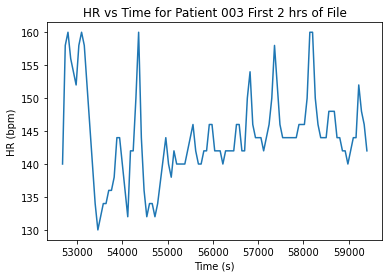

In [46]:
#SEABORN: HR trace for patient over first 2 hr interval -  USE THIS CODE GOING FORWARD!
import seaborn as sns
fig1 = sns.lineplot(data=t_intervals['t_2hr_0'], x = 'dts', y = 'HR')
fig1.set_title("HR vs Time for Patient 003 First 2 hrs of File")
fig1.set_xlabel("Time (s)")
fig1.set_ylabel("HR (bpm)")
#HR is in bpm and dts is in 60s intervals for first 2 hours of file


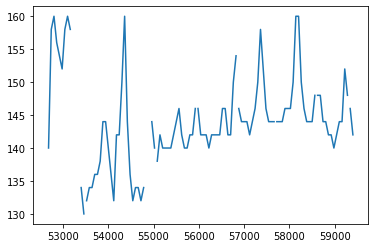

In [44]:
#MATPLOTLIB: HR trace for patient over first 2 hr interval
# dont use because doesnt interpolate data 
import matplotlib.pyplot as plt
data_t_int_1 = t_intervals['t_2hr_0']
x = data_t_int_1['dts']
y = data_t_int_1['HR']
#data_t_int_1['dts']
plt.plot(x,y)
#HR is in bpm and dts is in 60s intervals for first 2 hours of file